In [1]:
####### Importing all the necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
pd.options.display.float_format = '{:.4f}'.format
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from itertools import chain
from IPython.display import Image  
import pydotplus, graphviz



E:\Softwares\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
#### Reading the csv file into a dataframe

telecom_df = pd.read_csv("telecom_churn_data.csv")
telecom_df.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.3850,...,0,1.0000,1.0000,1.0000,nan,968,30.4000,0.0000,101.2000,3.5800
1,7001865778,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.0470,...,0,nan,1.0000,1.0000,nan,1006,0.0000,0.0000,0.0000,0.0000
2,7001625959,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.6900,...,0,nan,nan,nan,1.0000,1103,0.0000,0.0000,4.1700,0.0000
3,7001204172,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.3380,...,0,nan,nan,nan,nan,2491,0.0000,0.0000,0.0000,0.0000
4,7000142493,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.6360,...,0,0.0000,nan,nan,nan,1526,0.0000,0.0000,0.0000,0.0000


In [3]:
telecom_df.shape

(99999, 226)

# Data understanding, preparation, and feature engineering 

In [4]:
# pd.options.display.max_info_rows
pd.options.display.max_info_columns = 250

telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [5]:
telecom_df.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [6]:

########## checking if any column has all the values as null

telecom_df.isnull().all(axis=0).sum()


0

In [7]:

######### checking if there are any duplicates in the mobile_number column

len(telecom_df.mobile_number.value_counts())


99999

In [8]:

### Identified that there are around 40 columns which have more more than 70 % null values

(telecom_df.isna().mean().round(4) * 100 > 70).sum()


40

In [9]:

########## Removing all the columns which have more than 70 % null values

telecom_df.dropna(axis=1, thresh=0.3*len(telecom_df), inplace=True)


In [10]:

telecom_df.shape


(99999, 186)

In [11]:

######### Identifying columns which have single unique value

telecom_df.columns[telecom_df.nunique() <= 1]


Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [12]:

len(telecom_df.columns[telecom_df.nunique() <= 1])


16

In [13]:

######## dropping all the 16 columns which have single unique value, as these columns have 0 variance

telecom_df.drop(columns=['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 
                         'last_date_of_month_7', 'last_date_of_month_8','last_date_of_month_9', 'std_og_t2c_mou_6', 
                         'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], inplace=True)


In [14]:

####### checking the number of columns left after dropping 16 columns with single unique value

telecom_df.shape


(99999, 170)

### Cleaning date columns

In [15]:

print(telecom_df.date_of_last_rech_6.astype(str).apply(lambda x : x[5:]).value_counts())

print(telecom_df.date_of_last_rech_7.astype(str).apply(lambda x : x[5:]).value_counts())

print(telecom_df.date_of_last_rech_8.astype(str).apply(lambda x : x[5:]).value_counts())


2014    96160
014      2232
         1607
Name: date_of_last_rech_6, dtype: int64
2014    96067
014      2165
         1767
Name: date_of_last_rech_7, dtype: int64
2014    91952
014      4425
         3622
Name: date_of_last_rech_8, dtype: int64


### In the date columns, month and year data is redundant. so removing month and year and keeping only day of month in the following date columns  date_of_last_rech_6, date_of_last_rech_7 and date_of_last_rech_8

In [16]:

#### Extracting day from the date columns
telecom_df.date_of_last_rech_6 = telecom_df.date_of_last_rech_6.astype(str).apply(lambda x : x[2:4])
telecom_df.date_of_last_rech_6 = telecom_df.date_of_last_rech_6.str.rstrip('/')
### whereever day is not there imputing those 'n' values with day 15th of the month
telecom_df.date_of_last_rech_6 = np.where(telecom_df.date_of_last_rech_6 == 'n', 15, telecom_df.date_of_last_rech_6)
telecom_df.date_of_last_rech_6 = telecom_df.date_of_last_rech_6.astype(int)
#print(telecom_df.date_of_last_rech_6.value_counts())


telecom_df.date_of_last_rech_7 = telecom_df.date_of_last_rech_7.astype(str).apply(lambda x : x[2:4])
telecom_df.date_of_last_rech_7 = telecom_df.date_of_last_rech_7.str.rstrip('/')
### whereever day is not there imputing those 'n' values with day 15th of the month
telecom_df.date_of_last_rech_7 = np.where(telecom_df.date_of_last_rech_7 == 'n', 15, telecom_df.date_of_last_rech_7)
telecom_df.date_of_last_rech_7 = telecom_df.date_of_last_rech_7.astype(int)
#print(telecom_df.date_of_last_rech_7.value_counts())


telecom_df.date_of_last_rech_8 = telecom_df.date_of_last_rech_8.astype(str).apply(lambda x : x[2:4])
telecom_df.date_of_last_rech_8 = telecom_df.date_of_last_rech_8.str.rstrip('/')
### whereever day is not there imputing those 'n' values with day 15th of the month
telecom_df.date_of_last_rech_8 = np.where(telecom_df.date_of_last_rech_8 == 'n', 15, telecom_df.date_of_last_rech_8)
telecom_df.date_of_last_rech_8 = telecom_df.date_of_last_rech_8.astype(int)
#print(telecom_df.date_of_last_rech_8.value_counts())


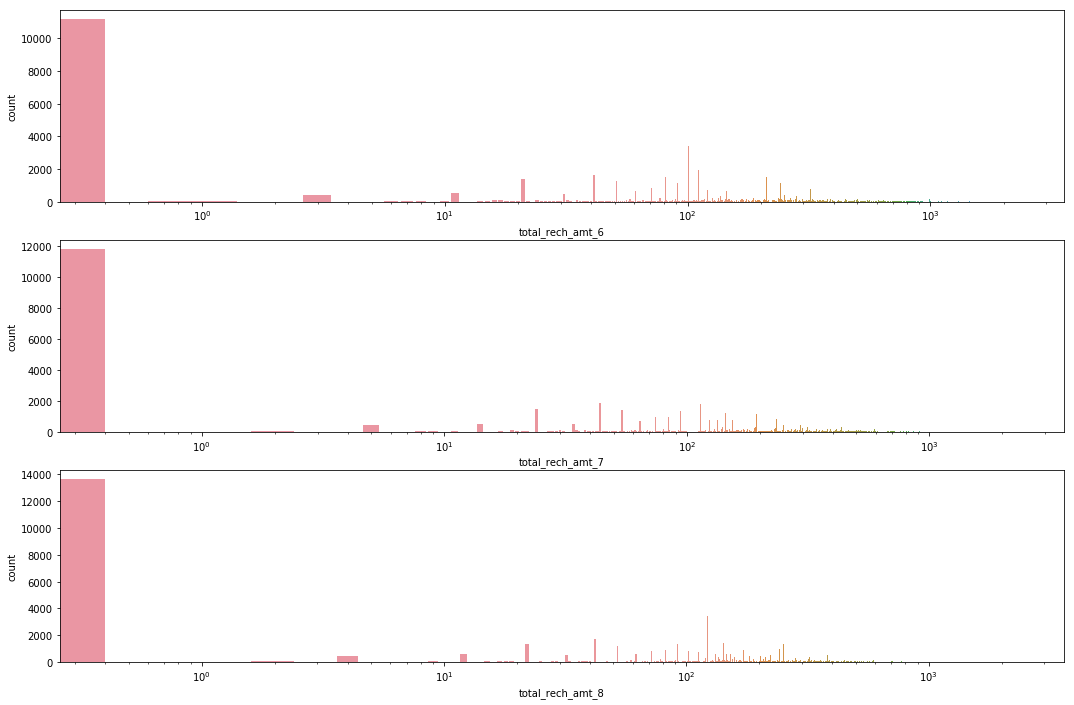

In [17]:
########### Performing univariate analysis on total_rech_amt_6, total_rech_amt_7 and total_rech_amt_8

plt.figure(figsize=(18, 12))
plt.subplot(3, 1, 1)
sns.countplot(x='total_rech_amt_6', data=telecom_df)
plt.xscale('log')
plt.subplot(3, 1, 2)
sns.countplot(x='total_rech_amt_7', data=telecom_df)
plt.xscale('log')
plt.subplot(3, 1, 3)
sns.countplot(x='total_rech_amt_8', data=telecom_df)
plt.xscale('log')
plt.show()


### From the above plot, observered that lot of customers have not done any recharge in the 6th, 7th and 8th months

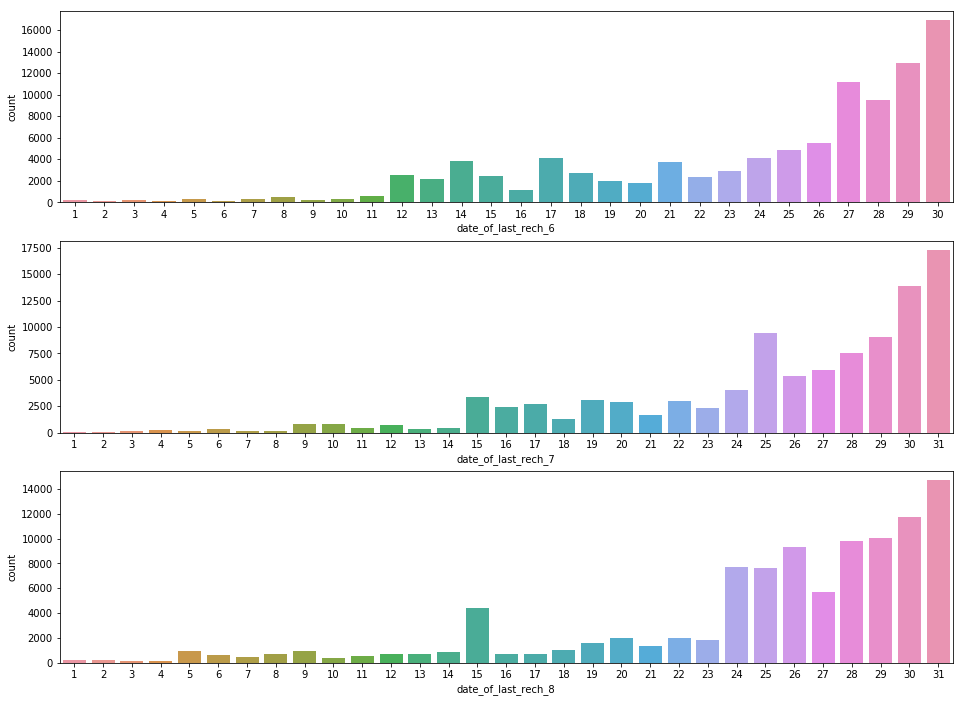

In [18]:
########### Performing univariate analysis on date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8 

plt.figure(figsize=(16, 12))
plt.subplot(3, 1, 1)
sns.countplot(x='date_of_last_rech_6', data=telecom_df)
plt.subplot(3, 1, 2)
sns.countplot(x='date_of_last_rech_7', data=telecom_df)
plt.subplot(3, 1, 3)
sns.countplot(x='date_of_last_rech_8', data=telecom_df)
plt.show()


#### From the above plot, observered that the recharges are more towards the end of the months

### Creating a derived column 'avg_rech_amt_6_7'
- This column will have the average recharge amout of 6th and 7th months.

In [19]:
############ Creating a derived column called 'avg_rech_amt_6_7'. 
########### This column indicates average recharge amount of each customer in 6th and 7th month

telecom_df['avg_rech_amt_6_7'] = (telecom_df.total_rech_amt_6 + telecom_df.total_rech_amt_7)/2


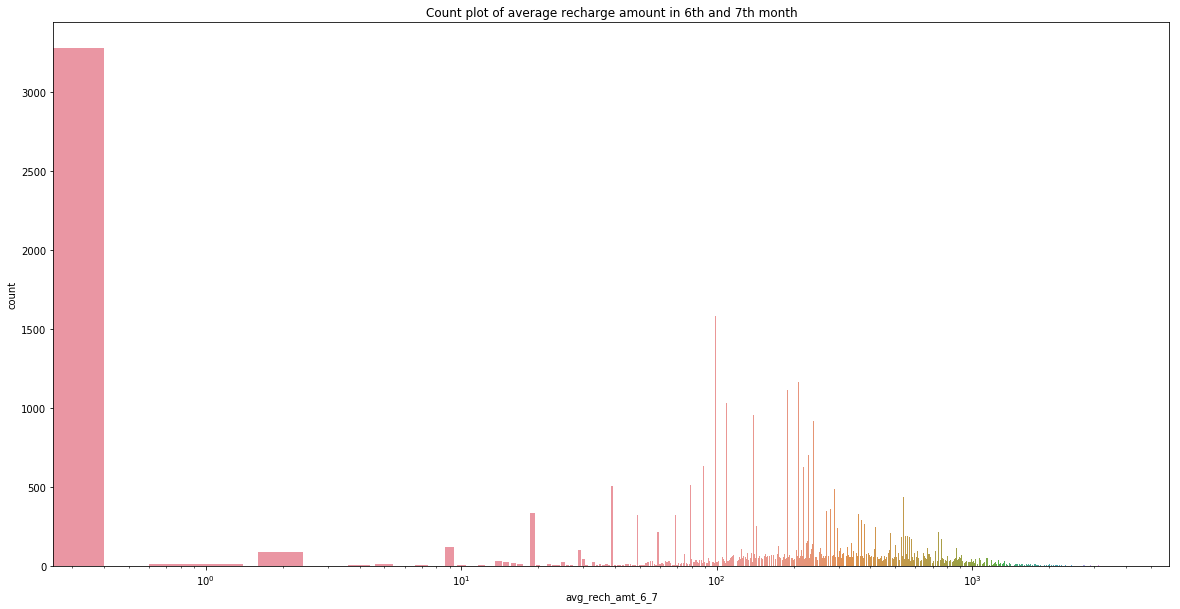

In [20]:
########### Performing univariate analysis on the derived column avg_rech_amt_6_7

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x='avg_rech_amt_6_7', data=telecom_df)
plt.title("Count plot of average recharge amount in 6th and 7th month")
plt.xlabel('avg_rech_amt_6_7')
plt.xscale('log')
plt.show()


## Filtering high value customers


In [21]:
##### Filtering high value customers ######

telecom_df.avg_rech_amt_6_7.quantile(0.7)


368.5

In [22]:

telecom_hvc_df = telecom_df[telecom_df.avg_rech_amt_6_7 > telecom_df.avg_rech_amt_6_7.quantile(0.7)].copy()


In [23]:

telecom_hvc_df.shape


(29979, 171)

In [24]:
############### Resetting indexes after filtering high value customers
############## For reset_index, we are passing drop as True, so that new index is not added.

telecom_hvc_df.reset_index(drop=True, inplace=True)


In [25]:
telecom_hvc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29979 entries, 0 to 29978
Data columns (total 171 columns):
mobile_number          29979 non-null int64
arpu_6                 29979 non-null float64
arpu_7                 29979 non-null float64
arpu_8                 29979 non-null float64
arpu_9                 29979 non-null float64
onnet_mou_6            29663 non-null float64
onnet_mou_7            29676 non-null float64
onnet_mou_8            29041 non-null float64
onnet_mou_9            28276 non-null float64
offnet_mou_6           29663 non-null float64
offnet_mou_7           29676 non-null float64
offnet_mou_8           29041 non-null float64
offnet_mou_9           28276 non-null float64
roam_ic_mou_6          29663 non-null float64
roam_ic_mou_7          29676 non-null float64
roam_ic_mou_8          29041 non-null float64
roam_ic_mou_9          28276 non-null float64
roam_og_mou_6          29663 non-null float64
roam_og_mou_7          29676 non-null float64
roam_og_mou_8     

## Tag churners and remove attributes of the churn phase

In [26]:
######### Tag churners based on 9th month data.

condition_for_churn = ((telecom_hvc_df.total_ic_mou_9 == 0) & (telecom_hvc_df.total_og_mou_9 == 0) & (telecom_hvc_df.vol_2g_mb_9 == 0) 
           & (telecom_hvc_df.vol_3g_mb_9 == 0)) 


######### Tagging churned customers

telecom_hvc_df['churn'] = np.where(condition_for_churn, 1, 0)
telecom_hvc_df.churn.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

## Removing attributes of the churn phase

In [27]:

month_9_col = [col for col in telecom_df if col.endswith('9')]
print("9th  month columns = ", month_9_col)
print("\n\n len(month_9_col) = ", len(month_9_col))


9th  month columns =  ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


 len(month_9_col) =  41


In [28]:

print("shape of dataframe before removing 9th month columns", telecom_hvc_df.shape)

telecom_hvc_df.drop(month_9_col, axis=1, inplace=True)

print("shape of dataframe after removing 9th month columns", telecom_hvc_df.shape)


shape of dataframe before removing 9th month columns (29979, 172)
shape of dataframe after removing 9th month columns (29979, 131)


### Removed 41 columns from the churn phase

In [29]:
telecom_hvc_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
0,7000701601,1069.1800,1349.8500,3171.4800,57.8400,54.6800,52.2900,453.4300,567.1600,325.9100,...,0,0,0,802,57.7400,19.3800,18.7400,0.0000,1185.0000,1
1,7001524846,378.7210,492.2230,137.3620,413.6900,351.0300,35.0800,94.6600,80.6300,136.4800,...,0,0,0,315,21.0300,910.6500,122.1600,0.0000,519.0000,0
2,7002191713,492.8460,205.6710,593.2600,501.7600,108.3900,534.2400,413.3100,119.2800,482.4600,...,0,0,0,2607,0.0000,0.0000,0.0000,0.0000,380.0000,0
3,7000875565,430.9750,299.8690,187.8940,50.5100,74.0100,70.6100,296.2900,229.7400,162.7600,...,0,0,0,511,0.0000,2.4500,21.8900,0.0000,459.0000,0
4,7000187447,690.0080,18.9800,25.4990,1185.9100,9.2800,7.7900,61.6400,0.0000,5.5400,...,0,0,0,667,0.0000,0.0000,0.0000,0.0000,408.0000,0


## Checking the churn rate

Text(0.5, 1.0, 'Percentage of churned and non-churned customers')

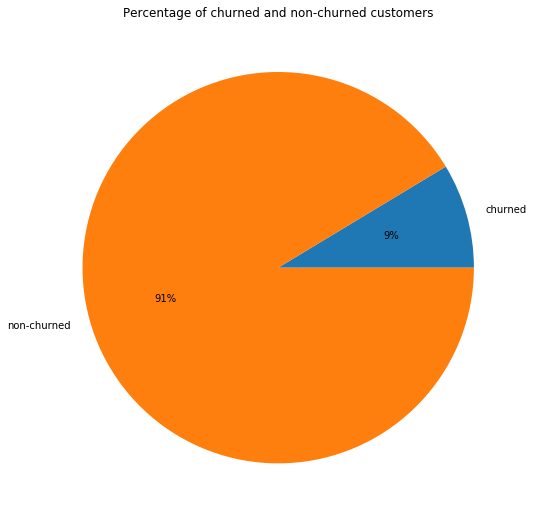

In [30]:

churn_percent = round(sum(telecom_hvc_df.churn == 1)/len(telecom_hvc_df) * 100, 2)
non_churn_percent = round(sum(telecom_hvc_df.churn == 0)/len(telecom_hvc_df) * 100, 2)

fig, ax = plt.subplots()
fig.set_size_inches(10, 9)
plt.pie([churn_percent, non_churn_percent], labels=['churned', 'non-churned'], autopct='%1.0f%%')
plt.title('Percentage of churned and non-churned customers')


### From the above pie plot we can see that 9% of the customers churned


In [31]:
# Checking percentage of missing values
list(round(100*(telecom_hvc_df.isnull().sum()/len(telecom_hvc_df.index)), 2))


[0.0,
 0.0,
 0.0,
 0.0,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 0.0,
 0.0,
 0.0,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 0.0,
 0.0,
 0.0,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 1.05,
 1.01,
 3.13,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [32]:
telecom_hvc_df.isnull().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6            316
onnet_mou_7            303
onnet_mou_8            938
offnet_mou_6           316
offnet_mou_7           303
offnet_mou_8           938
roam_ic_mou_6          316
roam_ic_mou_7          303
roam_ic_mou_8          938
roam_og_mou_6          316
roam_og_mou_7          303
roam_og_mou_8          938
loc_og_t2t_mou_6       316
loc_og_t2t_mou_7       303
loc_og_t2t_mou_8       938
loc_og_t2m_mou_6       316
loc_og_t2m_mou_7       303
loc_og_t2m_mou_8       938
loc_og_t2f_mou_6       316
loc_og_t2f_mou_7       303
loc_og_t2f_mou_8       938
loc_og_t2c_mou_6       316
loc_og_t2c_mou_7       303
loc_og_t2c_mou_8       938
loc_og_mou_6           316
loc_og_mou_7           303
                      ... 
date_of_last_rech_7      0
date_of_last_rech_8      0
last_day_rch_amt_6       0
last_day_rch_amt_7       0
last_day_rch_amt_8       0
vol_2g_mb_6              0
v

### As very less percentage of values are nulls, imputing all the null values with 0s 

In [33]:

telecom_hvc_df.fillna(0, inplace=True)


### Now we don't have any missing values

In [34]:

list(telecom_hvc_df.isnull().sum())


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [35]:

### Finding columns which have 90% of the values as zeros

print(telecom_hvc_df.columns[((telecom_hvc_df==0).mean()>0.9)])


### dropping columns which have 90% of the values as 0s

columns_with_majority_zeros = ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'og_others_7',
       'og_others_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sep_vbc_3g']

telecom_hvc_df.drop(columns=columns_with_majority_zeros, axis=1, inplace=True)

print("shape",telecom_hvc_df.shape)


Index(['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'og_others_7',
       'og_others_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'sep_vbc_3g', 'churn'],
      dtype='object')
shape (29979, 120)


### Feature Standardisation

In [36]:

### Normalizing all the features except mobile_number and churn columns
temp_df = telecom_hvc_df[['mobile_number', 'churn']].copy()

### dropping mobile_number and churn columns before applying normalization
telecom_hvc_std_df = telecom_hvc_df.drop(columns=['mobile_number', 'churn'])

telecom_hvc_std_df=(telecom_hvc_std_df-telecom_hvc_std_df.mean())/telecom_hvc_std_df.std()
telecom_hvc_std_df = pd.concat([telecom_hvc_std_df, temp_df], axis=1)
telecom_hvc_std_df.head()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,mobile_number,churn
0,1.0875,1.6422,5.3537,-0.5172,-0.5185,-0.4617,0.0750,0.2939,-0.1031,-0.0151,...,-0.3029,-0.2985,-0.2972,-0.4739,-0.1837,-0.2838,-0.2634,0.9981,7000701601,1
1,-0.4716,-0.2099,-0.8076,0.2548,0.0964,-0.4986,-0.6871,-0.7057,-0.4997,-0.2201,...,-0.3029,-0.2985,-0.2972,-0.9733,-0.2776,1.8995,0.0018,-0.3641,7001524846,0
2,-0.2139,-0.8288,0.1182,0.4459,-0.4071,0.5708,-0.0102,-0.6263,0.2246,0.0771,...,-0.3029,-0.2985,-0.2972,1.3770,-0.3315,-0.3313,-0.3115,-0.6484,7002191713,0
3,-0.3536,-0.6253,-0.7050,-0.5331,-0.4784,-0.4225,-0.2588,-0.3993,-0.4447,-0.2201,...,-0.3029,-0.2985,-0.2972,-0.7723,-0.3315,-0.3253,-0.2553,-0.4868,7000875565,0
4,0.2313,-1.2319,-1.0348,1.9301,-0.6127,-0.5571,-0.7572,-0.8714,-0.7738,-0.2201,...,-0.3029,-0.2985,-0.2972,-0.6124,-0.3315,-0.3313,-0.3115,-0.5911,7000187447,0


# Modelling (churn prediction)

### Splitting Data into Training and Test Sets

In [37]:

# Putting feature variables to X
X = telecom_hvc_std_df.drop(['churn', 'mobile_number'], axis=1)

print(X.shape)
X.head()


(29979, 118)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
0,1.0875,1.6422,5.3537,-0.5172,-0.5185,-0.4617,0.0750,0.2939,-0.1031,-0.0151,...,-0.3088,-0.3294,-0.3029,-0.2985,-0.2972,-0.4739,-0.1837,-0.2838,-0.2634,0.9981
1,-0.4716,-0.2099,-0.8076,0.2548,0.0964,-0.4986,-0.6871,-0.7057,-0.4997,-0.2201,...,0.2174,1.2970,-0.3029,-0.2985,-0.2972,-0.9733,-0.2776,1.8995,0.0018,-0.3641
2,-0.2139,-0.8288,0.1182,0.4459,-0.4071,0.5708,-0.0102,-0.6263,0.2246,0.0771,...,-0.3088,1.2970,-0.3029,-0.2985,-0.2972,1.3770,-0.3315,-0.3313,-0.3115,-0.6484
3,-0.3536,-0.6253,-0.7050,-0.5331,-0.4784,-0.4225,-0.2588,-0.3993,-0.4447,-0.2201,...,-0.3088,-0.3294,-0.3029,-0.2985,-0.2972,-0.7723,-0.3315,-0.3253,-0.2553,-0.4868
4,0.2313,-1.2319,-1.0348,1.9301,-0.6127,-0.5571,-0.7572,-0.8714,-0.7738,-0.2201,...,-0.3088,-0.3294,-0.3029,-0.2985,-0.2972,-0.6124,-0.3315,-0.3313,-0.3115,-0.5911


In [38]:
# Putting response variable to y
y = telecom_hvc_std_df['churn']

y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

In [39]:

# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20985 entries, 26370 to 5640
Data columns (total 118 columns):
arpu_6                 20985 non-null float64
arpu_7                 20985 non-null float64
arpu_8                 20985 non-null float64
onnet_mou_6            20985 non-null float64
onnet_mou_7            20985 non-null float64
onnet_mou_8            20985 non-null float64
offnet_mou_6           20985 non-null float64
offnet_mou_7           20985 non-null float64
offnet_mou_8           20985 non-null float64
roam_ic_mou_6          20985 non-null float64
roam_ic_mou_7          20985 non-null float64
roam_ic_mou_8          20985 non-null float64
roam_og_mou_6          20985 non-null float64
roam_og_mou_7          20985 non-null float64
roam_og_mou_8          20985 non-null float64
loc_og_t2t_mou_6       20985 non-null float64
loc_og_t2t_mou_7       20985 non-null float64
loc_og_t2t_mou_8       20985 non-null float64
loc_og_t2m_mou_6       20985 non-null float64
loc_og_t2m_mo

## Dimensionality Reduction using PCA

In [41]:

pca = PCA(svd_solver='randomized', random_state=42)


In [42]:

#Doing the PCA on the train data

pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [43]:
print("length of PCA components is same as number of original features = ",len(pca.components_), end='\n')
pca.components_

length of PCA components is same as number of original features =  118


array([[ 1.54953736e-01,  1.70182720e-01,  1.72621551e-01, ...,
         4.22075733e-02,  3.72789805e-02,  1.79995858e-01],
       [ 9.91029115e-02,  1.22418939e-01,  1.08468871e-01, ...,
        -6.16062123e-02, -5.93914555e-02,  1.22364886e-01],
       [ 1.46833933e-01,  1.67542543e-01,  1.58860274e-01, ...,
         1.93669070e-01,  1.84877393e-01,  1.79564328e-01],
       ...,
       [-7.58836779e-08,  1.31866825e-08,  3.44572566e-07, ...,
         1.25798927e-08, -8.44527535e-09,  1.37366876e-08],
       [ 2.06114168e-07,  3.18720526e-07, -9.43999837e-09, ...,
         9.75719569e-09, -3.18654142e-08, -8.29140607e-08],
       [-2.07655763e-16,  3.33055044e-16,  3.64043953e-16, ...,
        -1.15198878e-16, -5.54863348e-18, -7.82042297e-01]])

In [44]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.1550,0.0991,arpu_6
1,0.1702,0.1224,arpu_7
2,0.1726,0.1085,arpu_8
3,0.0511,0.1496,onnet_mou_6
4,0.0576,0.1717,onnet_mou_7


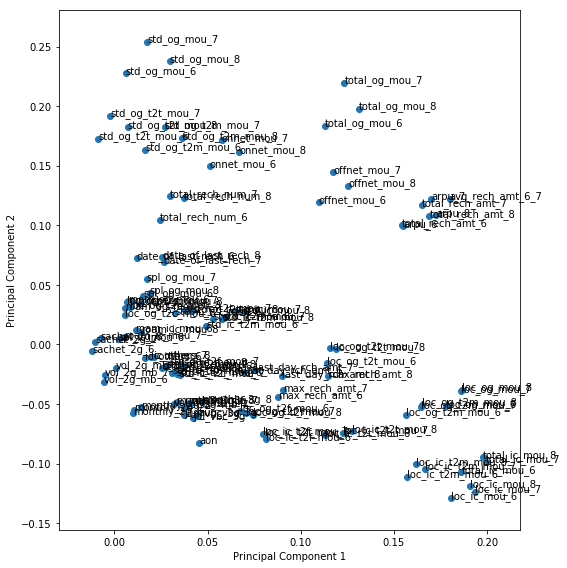

In [45]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

### Looking at the screeplot to assess the number of needed principal components

In [46]:
pca.explained_variance_ratio_

array([1.05381511e-01, 9.19117284e-02, 6.27819338e-02, 5.07313264e-02,
       3.97876856e-02, 3.77312360e-02, 2.94540070e-02, 2.84295679e-02,
       2.73697841e-02, 2.63862620e-02, 2.57903187e-02, 2.40978997e-02,
       2.31609158e-02, 2.20489026e-02, 2.10380957e-02, 1.94569823e-02,
       1.89215488e-02, 1.56767707e-02, 1.52105305e-02, 1.41308306e-02,
       1.22505368e-02, 1.20419262e-02, 1.06256168e-02, 1.04964260e-02,
       9.93223124e-03, 9.29052926e-03, 8.54945606e-03, 8.16613412e-03,
       8.13975947e-03, 7.54553028e-03, 7.40551295e-03, 7.23307605e-03,
       7.05463196e-03, 6.86706433e-03, 6.67065536e-03, 6.53166611e-03,
       6.40748392e-03, 6.20936848e-03, 5.92767484e-03, 5.74757233e-03,
       5.36402314e-03, 5.29768761e-03, 5.16430717e-03, 4.93307791e-03,
       4.80677393e-03, 4.71142050e-03, 4.49900800e-03, 4.41169526e-03,
       4.18546279e-03, 4.09071173e-03, 4.03487990e-03, 4.00032469e-03,
       3.71666410e-03, 3.55555149e-03, 3.37629629e-03, 3.31976345e-03,
      

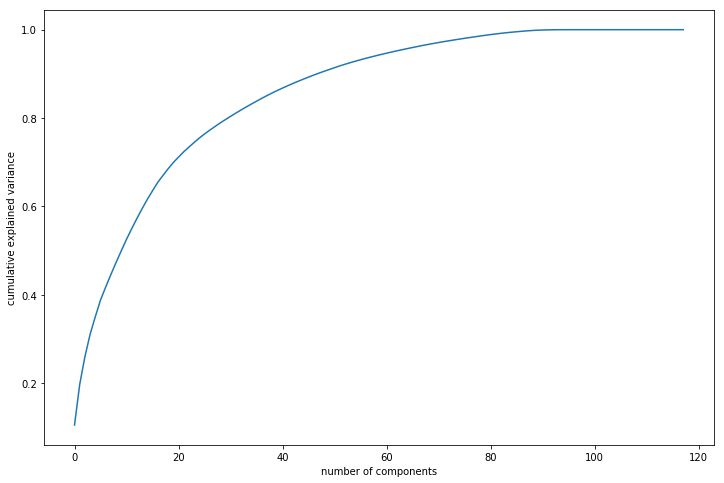

In [47]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Looks like 60 components are enough to describe 95% of the variance in the dataset
- We'll choose 60 components for our modeling

In [48]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets

pca_final = IncrementalPCA(n_components=60)


### Basis transformation - getting the data onto our PCs

In [49]:

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape


(20985, 60)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [50]:

#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())


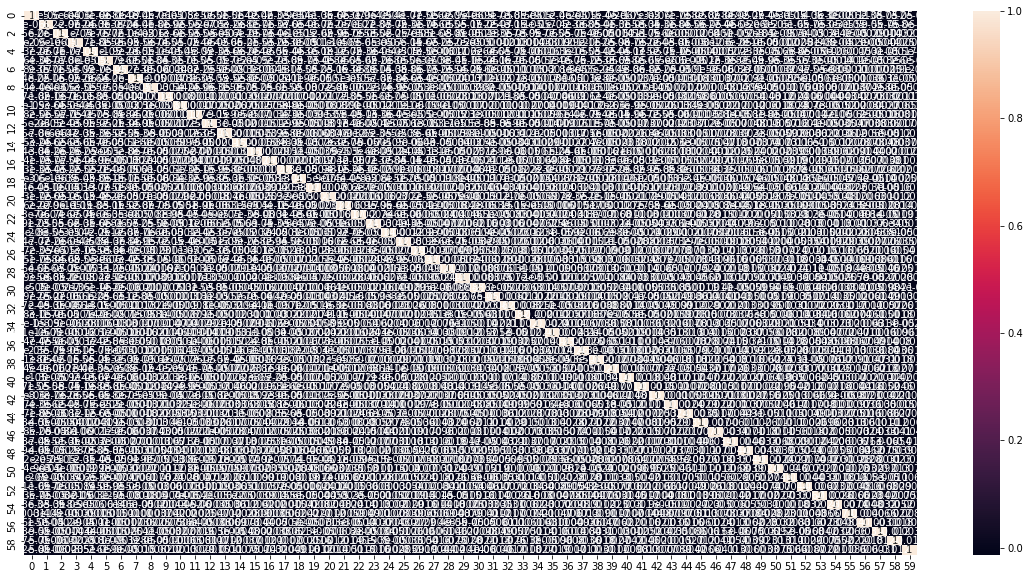

In [51]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [52]:

# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0


max corr: 0.011550704905018243 , min corr:  -0.013336953672785088


### Indeed - there is no correlation between any two components
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [53]:
#Applying selected components to the test data - 60 components

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape


(8994, 60)

### Using SMOTE class balancing technique to create class balanced data set

In [54]:

sm = SMOTE(random_state=42, ratio=1.0)
X_train_smote, y_train_smote = sm.fit_sample(df_train_pca, y_train)
print(y_train.value_counts(), end='\n\n') 
print("After applying smote, counts of churn and non-churn labels are balanced", end='\n\n') 
print(np.bincount(y_train_smote)) 


0    19211
1     1774
Name: churn, dtype: int64

After applying smote, counts of churn and non-churn labels are balanced

[19211 19211]


### Applying  logistic regression on our Principal Components


In [55]:
#Training the model on the train data

learner_pca = LogisticRegression(solver='lbfgs')
logistic_model_pca = learner_pca.fit(X_train_smote, y_train_smote)

## E:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
##  FutureWarning)

In [56]:

##### predicting on the test data
smote_pred = logistic_model_pca.predict(df_test_pca)


Predicted     0     1
Actual               
0          6866  1313
1           156   659


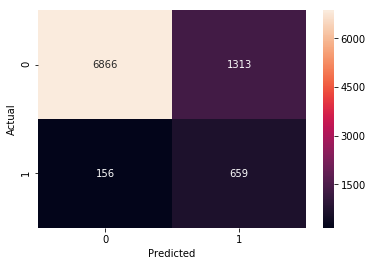

In [57]:
# Printing confusion matrix
confusion_matrix = pd.crosstab(y_test, smote_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, fmt='d')


## Model Evaluation

In [58]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [59]:
# Getting the predicted values on the test set
pred_probs_test = logistic_model_pca.predict_proba(df_test_pca)[:,1]
pred_probs_test

array([0.00034575, 0.04832914, 0.0620385 , ..., 0.25635538, 0.0006795 ,
       0.11739489])

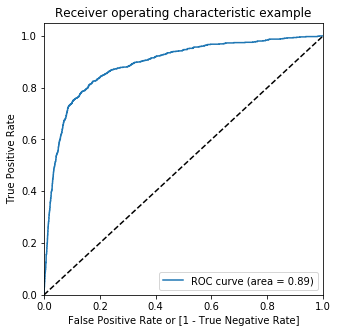

In [60]:

# Calling the draw_roc() function
draw_roc(y_test, pred_probs_test)


In [61]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'


### The evaluation metric that we are interested in for this case study is recall (sensitivity)

- Higher value of recall (sensitivity) indicates that the model can output correctly predicted churn labels in high numbers.


In [62]:

### Recall (Sensitivity) is the evaluation metric that we are interested in for this case study

recall_score(y_test, smote_pred)


0.8085889570552147

### Model Hyper-parameter tuning to increase recall score

In [63]:
# Create regularization penalty space
penalty = ['l2']  ## penalty supports only 12 or none

# Create hyperparameter options
hyperparameters = dict(C=[0.001, 0.01, 0.1, 1, 10, 100, 1000], penalty=penalty)

In [64]:
tuned_logistic_clf = GridSearchCV(logistic_model_pca, hyperparameters, cv=10, verbose=0)

In [65]:
# Fit grid search
tuned_logistic_model = tuned_logistic_clf.fit(X_train_smote, y_train_smote)

In [66]:
# View best hyperparameters
print('Best Penalty:', tuned_logistic_model.best_estimator_.get_params()['penalty'])
print('Best C:', tuned_logistic_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.01


In [67]:
##### predicting on the test data
tuned_logistic_pred = tuned_logistic_model.predict(df_test_pca)


Predicted     0     1
Actual               
0          6866  1313
1           156   659


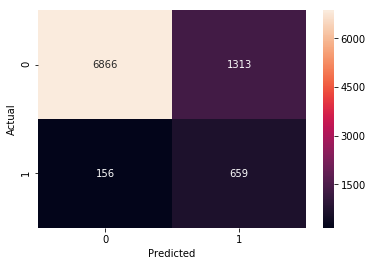

In [68]:
# Printing confusion matrix
confusion_matrix = pd.crosstab(y_test, smote_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, fmt='d')


- Did not find any improvement in the recall score after hyper parameter tuning of logistic regression model

### Building Random Forest Classifier model to see if we can get a better recall ( sensitivity) value

In [69]:
# Running the random forest with default parameters.

rfc = RandomForestClassifier()


In [70]:
# fit the rfc model

rfc.fit(X_train_smote, y_train_smote)


E:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Evaluating random forest regression model

In [71]:
##### predicting on the test data

rfc_pred = rfc.predict(df_test_pca)


In [72]:
# Let's check the report of our default model

print(classification_report(y_test, rfc_pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8179
           1       0.48      0.49      0.48       815

    accuracy                           0.90      8994
   macro avg       0.71      0.72      0.72      8994
weighted avg       0.91      0.90      0.91      8994



In [73]:
### Recall (Sensitivity) is the evaluation metric that we are interested in for this case study

recall_score(y_test, rfc_pred)


0.49325153374233127

### Tuning hyper parameters of Random Forest Classifier model to improve the recall value

- Finding optimal hyper parameters using gridsearch 

In [74]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rfc_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='recall', cv = 3, n_jobs = -1, verbose = 1)

In [75]:
# Fit the grid search to the data
rfc_grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 32.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [76]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of', rfc_grid_search.best_score_, 'using', rfc_grid_search.best_params_)


We can get accuracy of 0.8443079485711311 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


### Fitting the final random forest classifier model with the best parameters obtained from grid search.

In [77]:
rfc_final = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [78]:
# fit the rfc model

rfc_final.fit(X_train_smote, y_train_smote)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
##### predicting on the test data

rfc_final_pred = rfc_final.predict(df_test_pca)


Predicted     0    1
Actual              
0          7200  979
1           205  610


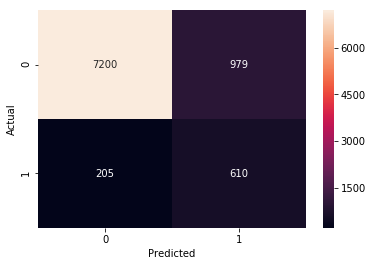

In [80]:
# Printing confusion matrix
confusion_matrix = pd.crosstab(y_test, rfc_final_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, fmt='d')


In [81]:

# Let's check the report of our default model
print(classification_report(y_test, rfc_final_pred))


              precision    recall  f1-score   support

           0       0.97      0.88      0.92      8179
           1       0.38      0.75      0.51       815

    accuracy                           0.87      8994
   macro avg       0.68      0.81      0.72      8994
weighted avg       0.92      0.87      0.89      8994



In [82]:
### Recall (Sensitivity) is the evaluation metric that we are interested in for this case study

### Recall score of Random Forest Classifier
recall_score(y_test, rfc_final_pred)


0.7484662576687117

- Recall score of random forest classifier has increased from 49 to 75

### Defining model selection helper function to try various classifiers

In [83]:
class EstimatorSelectionHelper:
    
    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, X, y, **grid_kwargs):
        for key in self.keys:
            print('Running GridSearchCV for %s.' % key)
            model = self.models[key]
            params = self.params[key]
            grid_search = GridSearchCV(model, params, **grid_kwargs)
            grid_search.fit(X, y)
            self.grid_searches[key] = grid_search
        print('Done.')
    
    def score_summary(self, sort_by='mean_test_score'):
        frames = []
        for name, grid_search in self.grid_searches.items():
            frame = pd.DataFrame(grid_search.cv_results_)
            frame = frame.filter(regex='^(?!.*param_).*$')
            frame['estimator'] = len(frame)*[name]
            frames.append(frame)
        df = pd.concat(frames)
        
        df = df.sort_values([sort_by], ascending=False)
        df = df.reset_index()
        df = df.drop(['rank_test_score', 'index'], 1)
        
        columns = df.columns.tolist()
        columns.remove('estimator')
        columns = ['estimator']+columns
        df = df[columns]
        return df

In [84]:

models1 = { 
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

params1 = { 
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'RandomForestClassifier': [
        { 'n_estimators': [16, 32] },
        {'criterion': ['gini', 'entropy'], 'n_estimators': [8, 16]}],
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] }
}


In [85]:

helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train_smote, y_train_smote, scoring='recall', n_jobs=2)
helper1.score_summary()


Running GridSearchCV for ExtraTreesClassifier.


E:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Running GridSearchCV for RandomForestClassifier.


E:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Running GridSearchCV for AdaBoostClassifier.


E:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Running GridSearchCV for GradientBoostingClassifier.


E:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Done.


,estimator,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score
0,ExtraTreesClassifier,3.1225,0.5367,0.1599,0.0188,{'n_estimators': 32},0.9725,0.9667,0.9689,0.9694,0.0024
1,ExtraTreesClassifier,1.9739,0.1103,0.1483,0.0227,{'n_estimators': 16},0.9608,0.9566,0.9631,0.9602,0.0027
2,RandomForestClassifier,9.0408,0.2649,0.1159,0.0014,{'n_estimators': 32},0.9586,0.9517,0.9560,0.9554,0.0028
3,RandomForestClassifier,5.9463,0.4543,0.0576,0.0053,"{'criterion': 'entropy', 'n_estimators': 16}",0.9483,0.9480,0.9517,0.9494,0.0017
4,RandomForestClassifier,5.2920,0.1203,0.0786,0.0118,{'n_estimators': 16},0.9453,0.9466,0.9464,0.9461,0.0006
5,RandomForestClassifier,4.3425,0.3464,0.0606,0.0009,"{'criterion': 'gini', 'n_estimators': 16}",0.9472,0.9436,0.9439,0.9449,0.0016
6,RandomForestClassifier,3.3304,0.0971,0.0353,0.0034,"{'criterion': 'entropy', 'n_estimators': 8}",0.9238,0.9224,0.9274,0.9245,0.0021
7,RandomForestClassifier,2.5052,0.1977,0.0573,0.0210,"{'criterion': 'gini', 'n_estimators': 8}",0.9222,0.9215,0.9210,0.9216,0.0005
8,GradientBoostingClassifier,8.3619,1.1635,0.0227,0.0026,"{'learning_rate': 1.0, 'n_estimators': 32}",0.8737,0.8910,0.8943,0.8863,0.0090
9,GradientBoostingClassifier,9.1011,0.1248,0.0233,0.0017,"{'learning_rate': 0.8, 'n_estimators': 32}",0.8721,0.8830,0.8885,0.8812,0.0068


### From the above table, we can see that ExtraTreesClassifier has high mean_test_score. So let's build ExtraTreesClassifier model

In [86]:
#### Building ExtraTreesClassifier model

etc = ExtraTreesClassifier(n_estimators=32)


In [87]:
# fit the rfc model
etc.fit(X_train_smote, y_train_smote)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [88]:
##### predicting on the test data
etc_pred = etc.predict(df_test_pca)


In [89]:
### Recall (Sensitivity) is the evaluation metric that we are interested in for this case study

recall_score(y_test, etc_pred)


0.43803680981595094

### Tuning hyper parameters of ExtraTreesClassifier model to improve the recall value

- Finding optimal hyper parameters using gridsearch 

In [90]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
et = ExtraTreesClassifier()
# Instantiate the grid search model
etc_grid_search = GridSearchCV(estimator = et, param_grid = param_grid, scoring='recall', cv = 3, n_jobs = -1, verbose = 1)

In [91]:
# Fit the grid search to the data
etc_grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  7.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10],

In [92]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of', etc_grid_search.best_score_, 'using', etc_grid_search.best_params_)


We can get accuracy of 0.8379574202279944 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 300}


### Fitting the final Extra Trees classifier model with the best parameters obtained from grid search.

In [93]:
etc_final = ExtraTreesClassifier(max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             max_features=5,
                             n_estimators=300)

In [94]:
# fit the rfc model
etc_final.fit(X_train_smote, y_train_smote)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=4, max_features=5, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=100, min_samples_split=400,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [95]:
##### predicting on the test data
etc_final_pred = etc_final.predict(df_test_pca)


In [96]:
### Recall (Sensitivity) is the evaluation metric that we are interested in for this case study

recall_score(y_test, etc_final_pred)


0.7595092024539877

### Tried 3 models, LogisticRegression, RandomForestClassifier and ExtraTreesClassifier models.

- Logistic Regression, Recall score = 81
- RandomForestClassifier, Recall score = 75
- ExtraTreesClassifier, Recall score = 76


- Logistic regression gave a better recall score of 81 out of all the 3 tried models



# Identifying important churn indicators and business recommendation

## Model-2 to identify the strong predictors of churn

### Using RFE for dimensionality reduction

In [97]:
### Using RFE for dimensionality reduction before applying decision tree classification

dt_default = DecisionTreeClassifier(max_depth=5)
rfe = RFE(dt_default, 60)     ## Running RFE, passing model and number of features to select
rfe = rfe.fit(X_train, y_train)


In [98]:
### listing the RFE selected features

rfe_selected_features = X_train.columns[rfe.support_]
print(rfe_selected_features, end='\n\n')

### Listing the RFE selected features along with their ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_mou_8',
       'std_og_t2m_mou_6', 'std_og_mou_7', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_6', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of

[('arpu_6', False, 58),
 ('arpu_7', False, 57),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', False, 3),
 ('loc_og_t2c_mou_6', False, 4),
 ('loc_og_t2c_mou_7', False, 6),
 ('loc_og_t2c_mou_8', False, 5),
 ('loc_og_mou_6', False, 10),
 ('loc_og_mou_7', False, 12),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 17),
 ('std_og_t2t_mou_7', False, 19),
 ('std_og_t2t_mou_8', False, 20),
 ('std_og_t2m

### Using SMOTE class balancing technique to create class balanced data set after RFE

In [99]:

X_train_rfe = X_train[rfe_selected_features]

sm = SMOTE(random_state=42, ratio=1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train_rfe, y_train)
print(y_train.value_counts(), end='\n\n') 
print("After applying smote, counts of churn and non-churn labels are balanced", end='\n\n') 
print(np.bincount(y_train_sm)) 


0    19211
1     1774
Name: churn, dtype: int64

After applying smote, counts of churn and non-churn labels are balanced

[19211 19211]


### Building the  DecisionTreeClassifier model using RFE selected features

In [100]:

### building the model using RFE selected features and 
dt_default.fit(X_train_sm, y_train_sm)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [101]:

# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions
X_test_rfe = X_test[rfe_selected_features]
y_pred_dt_default = dt_default.predict(X_test_rfe)

# Printing classification report
print(classification_report(y_test, y_pred_dt_default))


              precision    recall  f1-score   support

           0       0.97      0.90      0.94      8179
           1       0.43      0.75      0.55       815

    accuracy                           0.89      8994
   macro avg       0.70      0.83      0.74      8994
weighted avg       0.92      0.89      0.90      8994



In [104]:

# Printing confusion matrix and accuracy
print(accuracy_score(y_test, y_pred_dt_default))


0.8885923949299533


- we can see from the above values that the metric we are interested in (recall or sensitivity) does not have good value. So the next step is to tune the hyper parameters to get a model with high sensitivity  

### Hyperparameter Tuning

In [105]:

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [106]:

# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)


best accuracy 0.9095830513768154
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


### Running the model with best parameters obtained from grid search
- limiting max_depth = 3 to reduce model complexity and also overfitting

In [107]:

# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_gini.fit(X_train_sm, y_train_sm)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [108]:

# accuracy score
clf_gini.score(X_test_rfe, y_test)


0.822103624638648

In [109]:

y_pred_clf_gini = clf_gini.predict(X_test_rfe)
print(classification_report(y_test, y_pred_clf_gini))


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8179
           1       0.32      0.83      0.46       815

    accuracy                           0.82      8994
   macro avg       0.65      0.82      0.68      8994
weighted avg       0.92      0.82      0.85      8994



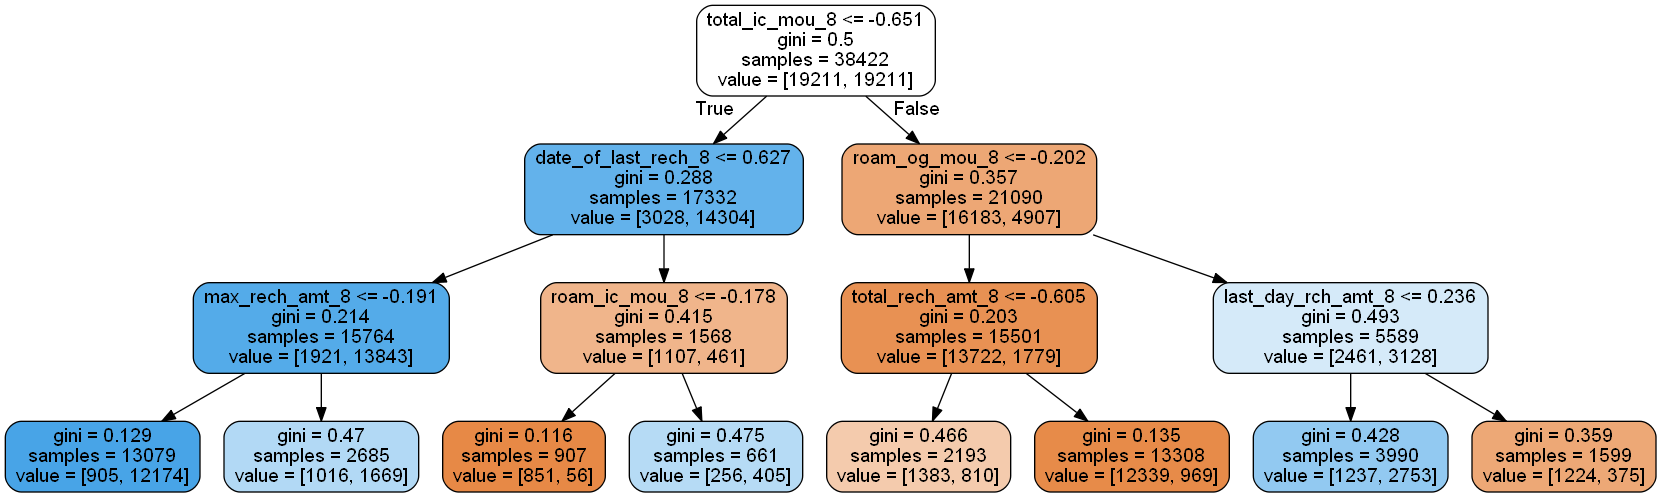

In [111]:

# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data, feature_names=list(X_train_rfe.columns), filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## Plotting the feature importances

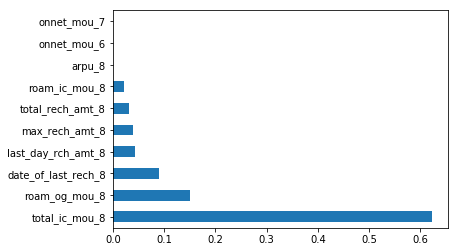

In [112]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf_gini.feature_importances_, index=X_train_rfe.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


### From the above plot, we can see the top 10 strong predictors of churn
- total_ic_mou_8
- roam_og_mou_8
- date_of_last_rech_8
- last_day_rch_amt_8
- total_rech_amt_8
- max_rech_amt_8
- roam_ic_mou_8
- arpu_8
- onnet_mou_6
- onnet_mout_7


### Actionable recommendations to prevent customer churn

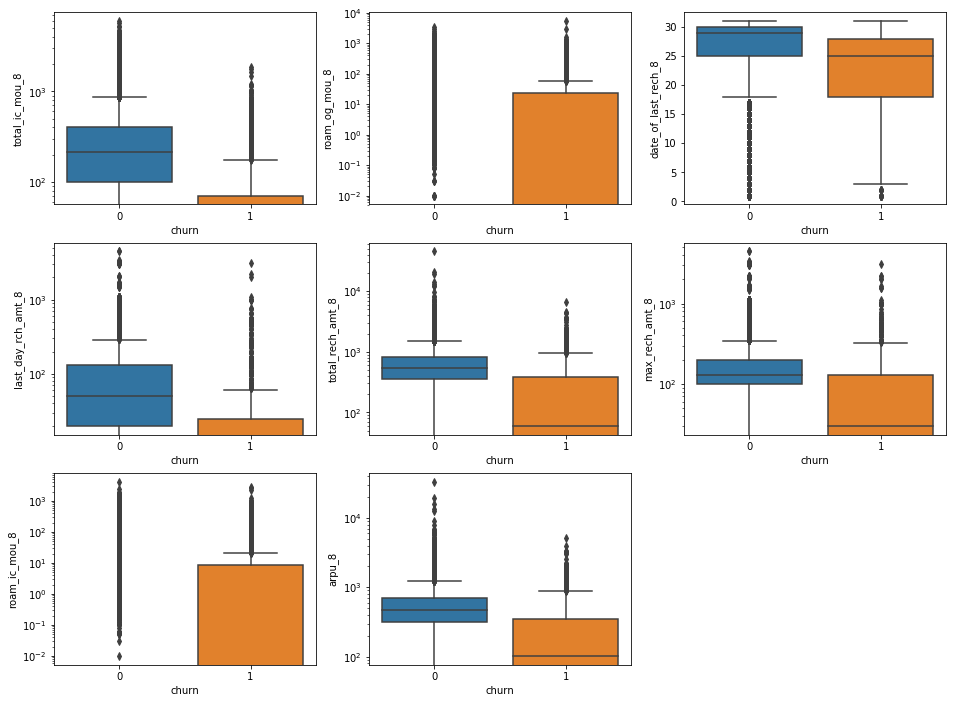

In [113]:
###### plotting graphs of identified strong predictor features versus churn

plt.figure(figsize=(16, 12))
plt.subplot(3, 3, 1)
sns.boxplot(x='churn', y='total_ic_mou_8', data=telecom_hvc_df)
plt.yscale('log')
plt.subplot(3, 3, 2)
sns.boxplot(x='churn', y='roam_og_mou_8', data=telecom_hvc_df)
plt.yscale('log')
plt.subplot(3, 3, 3)
sns.boxplot(x='churn', y='date_of_last_rech_8', data=telecom_hvc_df)
plt.subplot(3, 3, 4)
sns.boxplot(x='churn', y='last_day_rch_amt_8', data=telecom_hvc_df)
plt.yscale('log')
plt.subplot(3, 3, 5)
sns.boxplot(x='churn', y='total_rech_amt_8', data=telecom_hvc_df)
plt.yscale('log')
plt.subplot(3, 3, 6)
sns.boxplot(x='churn', y='max_rech_amt_8', data=telecom_hvc_df)
plt.yscale('log')
plt.subplot(3, 3, 7)
sns.boxplot(x='churn', y='roam_ic_mou_8', data=telecom_hvc_df)
plt.yscale('log')
plt.subplot(3, 3, 8)
sns.boxplot(x='churn', y='arpu_8', data=telecom_hvc_df)
plt.yscale('log')
plt.show()


### Observation from the above plots 
- From the above plots we can see that the customers whose incoming minutes of usage is less than 50 and also whose total recharge amount is less than 100 and also whose last day recharge amount is less than 30 are the customers who are more likely to churn.
   

In [114]:
######### Identifying the mobile numbers of customers who are likely to churn

action_mobile_list = list(telecom_hvc_df[(telecom_hvc_df.total_rech_amt_8 < 100) & (telecom_hvc_df.total_ic_mou_8 < 50) & (telecom_hvc_df.last_day_rch_amt_8 < 30)]['mobile_number'])

print("total mobile numbers to whom offers can be rolled out = ", len(action_mobile_list), end='\n\n')
action_mobile_list


total mobile numbers to whom offers can be rolled out =  1981



[7000187447,
 7001300706,
 7000106299,
 7000340381,
 7001873090,
 7002397045,
 7000465250,
 7002367203,
 7002255278,
 7002252754,
 7001481232,
 7000635248,
 7000506605,
 7000104470,
 7000369789,
 7000142585,
 7000670087,
 7000749983,
 7000248548,
 7001967148,
 7000185697,
 7000684775,
 7000234200,
 7001951091,
 7000636808,
 7000945323,
 7002322505,
 7000436570,
 7000006367,
 7000279353,
 7002305699,
 7000547257,
 7002276841,
 7001148059,
 7000063643,
 7001790424,
 7002024450,
 7001790709,
 7000126448,
 7001333153,
 7000398384,
 7000516213,
 7002079634,
 7000313556,
 7002141841,
 7001545189,
 7001231416,
 7000449111,
 7000063701,
 7001985190,
 7001005804,
 7000983556,
 7000307717,
 7000645116,
 7002157438,
 7001800602,
 7002047750,
 7001245858,
 7000373036,
 7002189589,
 7000048868,
 7000447510,
 7001595594,
 7001477589,
 7000723938,
 7000019100,
 7000808325,
 7000747251,
 7000333212,
 7002324263,
 7000045131,
 7000684637,
 7000805841,
 7001071199,
 7001905950,
 7002392392,
 7000787375,

### Actionable recommendations to prevent customer churn

- Some offers can be rolled out to all the above mentioned customer mobile numbers to prevent them from churning